In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [122]:
dataset_path = "../data/processed/bertopic_output.csv"

In [123]:
df = pd.read_csv(dataset_path)

print(df.shape)
df.head(5)

(4821, 6)


,label,text,cleaned_text,Topic,Probability,Topic_Label
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...,101,1.000000,russia
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area less NUM s...,50,0.853444,metre
2,negative,The international electronic industry company ...,international electronic industry company elco...,52,1.000000,elcoteq
3,positive,With the new production plant the company woul...,new production plant company would increase ca...,26,0.499497,tonne
4,positive,According to the company 's updated strategy f...,according company updated strategy year NUM NU...,-1,0.000000,outlier


In [124]:
topics = df["Topic_Label"].unique()
n_topics = len(topics)

print(f"{n_topics} topic totali:")
print(topics)

119 topic totali:
['russia' 'metre' 'elcoteq' 'tonne' 'outlier' 'aspo' 'increased' 'sale'
 'income' 'teliasonera' 'forest' 'oil' 'land' 'incap' 'dividend'
 'petersburg' 'relative' 'expects' 'bank' 'fsecure' 'beer' 'finnair'
 'fair' 'mln' 'eps' 'talvivaara' 'nokia' 'order' 'numpercent' 'percent'
 'aldata' 'pct' 'registered' 'teleste' 'power' 'option' 'voting'
 'delivery' 'pipette' 'turnover' 'tikkurila' 'revenue' 'flow' 'mn'
 'ruukki' 'sanoma' 'margin' 'cramo' 'balance' 'arena' 'tekla' 'wafer'
 'oriolakd' 'period' 'meat' 'charging' 'stonesoft' 'elevator' 'bridge'
 'pretax' 'design' 'cargotec' 'pkc' 'drive' 'brazil' 'salcomp' 'gypsii'
 'export' 'packaging' 'scanfil' 'ltd' 'patent' 'tyre' 'capman' 'mall'
 'contract' 'construct' 'value' 'statement' 'veneer' 'paper' 'investment'
 'viking' 'basware' 'cooperation' 'pharmaceutical' 'glass' 'store'
 'recommendation' 'narrowed' 'loss' 'reduction' 'cost' 'tax' 'saving'
 'benchmark' 'sport' 'nasdaq' 'fell' 'ceo' 'afternoon' 'fiskars'
 'disclosed' 

In [125]:
def custom_barplot(x_data, y_data, title, xlabel, ylabel, fig_size=(15,8)):    

    # Set dimensione e stile del grafico
    sns.set(style="whitegrid")  # stile seaborn
    warnings.filterwarnings("ignore", category=FutureWarning)
    plt.figure(figsize=fig_size)  # Altezza grande per visualizzare tutti i topic
    plot = sns.barplot(x=x_data, y=y_data, palette="viridis")
    
    plt.title(title, fontweight="bold", pad=15)
    plt.xlabel(xlabel, labelpad=10, fontweight="bold")
    plt.ylabel(ylabel, labelpad=10, fontweight="bold")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

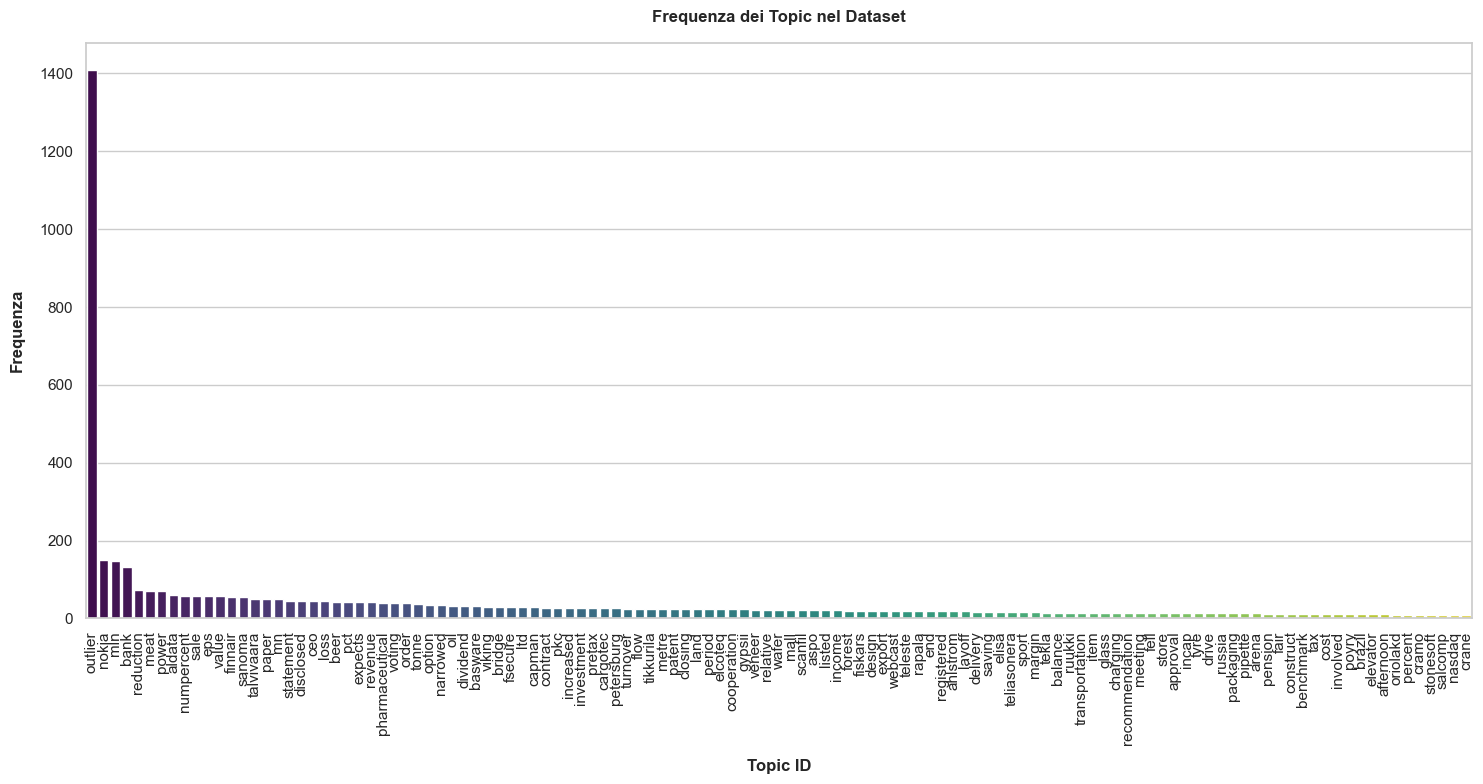

In [126]:
# Conta le occorrenze di ogni topic, ordinate in modo decrescente
topic_counts = df['Topic_Label'].value_counts().sort_values(ascending=False)  # ascending=True per barh (dal più piccolo al più grande)

custom_barplot(topic_counts.index, 
               topic_counts.values, 
               "Frequenza dei Topic nel Dataset",
               "Topic ID",
               "Frequenza")

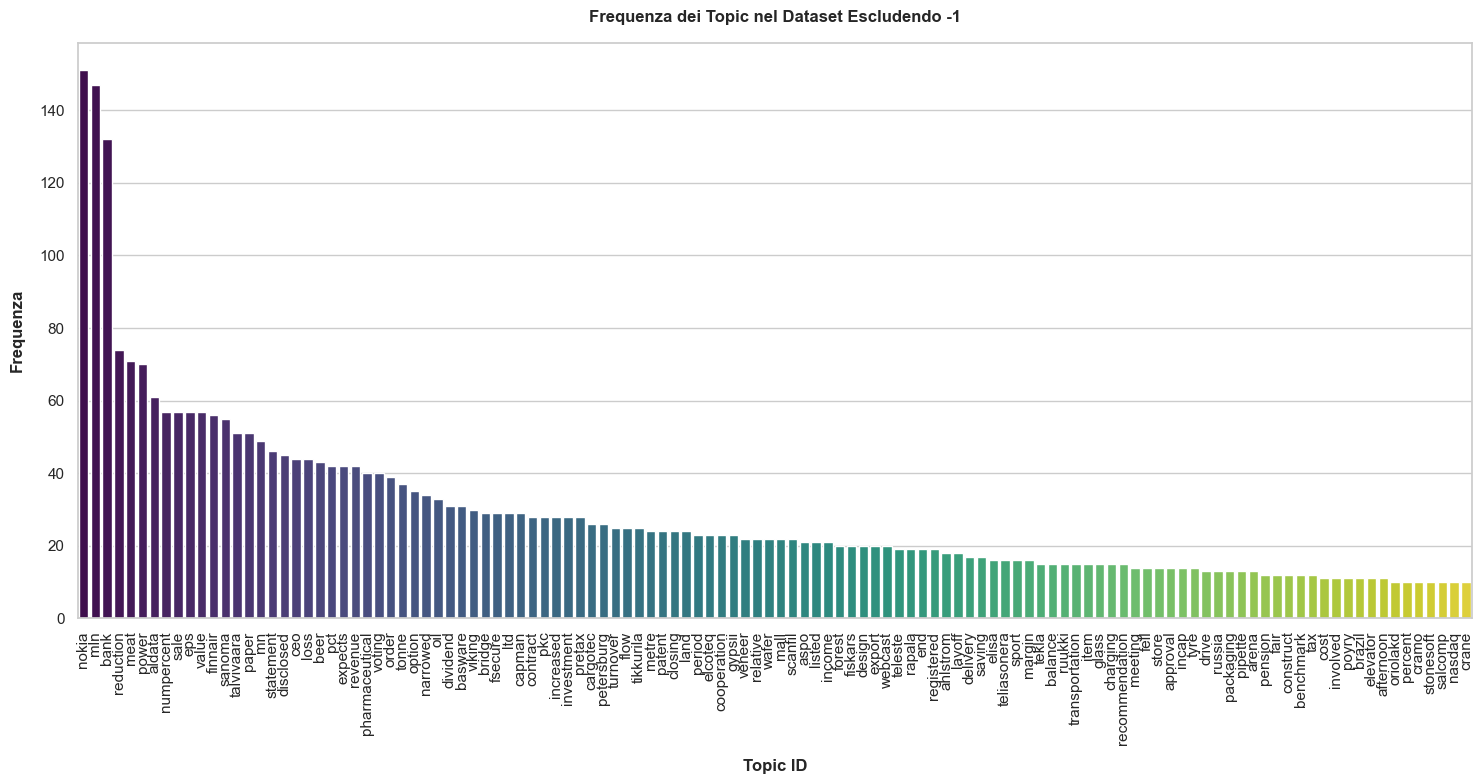

In [127]:
# Conta le occorrenze di ogni topic, ordinate in modo decrescente
df_noutlier = df[ df["Topic_Label"] != "outlier"]
topic_counts = df_noutlier['Topic_Label'].value_counts().sort_values(ascending=False)  # ascending=True per barh (dal più piccolo al più grande)

custom_barplot(topic_counts.index, 
               topic_counts.values, 
               "Frequenza dei Topic nel Dataset Escludendo -1",
               "Topic ID",
               "Frequenza")

In [146]:
# Aumenta la lunghezza massima dei valori di stringa mostrati
pd.set_option('display.max_colwidth', None)

df_nokia = df[df["Topic_Label"] == 'nokia']

print("Esempi di frasi con topic Nokia:")
for phrase in df_nokia["cleaned_text"].head(8):
    print("- " + phrase)

Esempi di frasi con topic Nokia:
- agreement strengthens longterm partnership nokia siemens network
- within framework partnership nokia siemens network signed initial framework purchase agreement sitronics subsidiary jsc mikron largest manufacturer exporter microelectronic component russia
- nokia also noted average selling price handset declined period though mobile phone profit margin rose NUM percent NUM percent yearago quarter
- tietoenator us nokia intellisync mobile suite wireless email calendar device management capability company extend service customer
- elisa said mobile subscription grew NUM percent NUM mainly customer adopting socalled third generation mobile technology
- nokia world largest mobile phone manufacturer china postel china largest mobile phone distributor longstanding partnership continues grow stronger time
- nokia messaging NUM enables customer receive email NUM email account mobile phone supporting pop imap email service
- phone targeted first time user gro

In [128]:
outlier_count = (df['Topic'] == -1).sum()

print(f"{outlier_count} frasi non sono state assegnate a nessun topic (outlier -1)")
print("\nEsempio di frasi non assegnate a dei topic")

df_outlier = df[df.Topic_Label == "outlier"]
for phrase in df_outlier["cleaned_text"].head(3):
    print("- " + phrase)

1408 frasi non sono state assegnate a nessun topic (outlier -1)

Esempio di frasi non assegnate a dei topic
- according company updated strategy year NUM NUM basware target longterm net sale growth range NUM_PERCENT NUM_PERCENT operating profit margin NUM_PERCENT NUM_PERCENT net sale
- operating profit totalled CUR NUM mn CUR NUM mn NUM representing NUM_PERCENT net sale
- clothing retail chain seppælæ sale increased NUM_PERCENT CUR NUM mn operating profit rose CUR NUM mn CUR NUM mn NUM


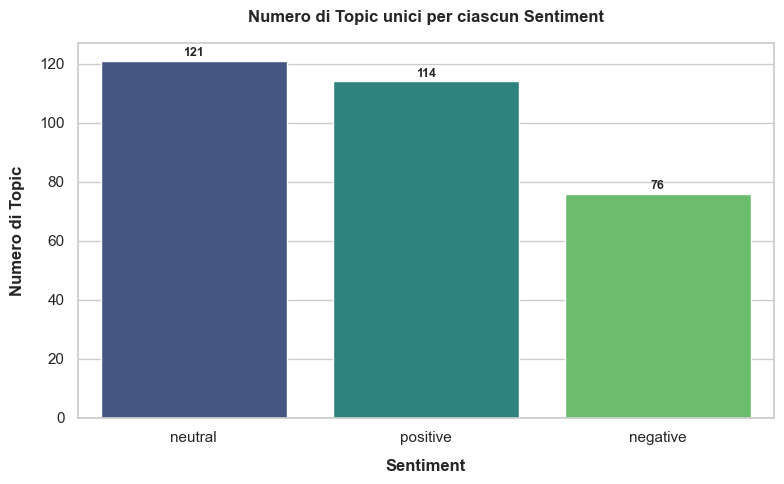

In [129]:
# Conta il numero di topic unici per ciascun sentimento
topics_per_sentiment = df.groupby('label')['Topic'].nunique().sort_values(ascending=False)


plt.figure(figsize=(8, 5))
topics_per_sentiment_df = topics_per_sentiment.reset_index(name='num_topics')

plot = sns.barplot(x='label', y='num_topics', data=topics_per_sentiment_df, palette='viridis')
for i, count in enumerate(topics_per_sentiment.values):
    plot.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title("Numero di Topic unici per ciascun Sentiment", fontweight="bold", pad=15)
plt.ylabel("Numero di Topic", fontweight="bold", labelpad=10)
plt.xlabel("Sentiment", fontweight="bold", labelpad=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


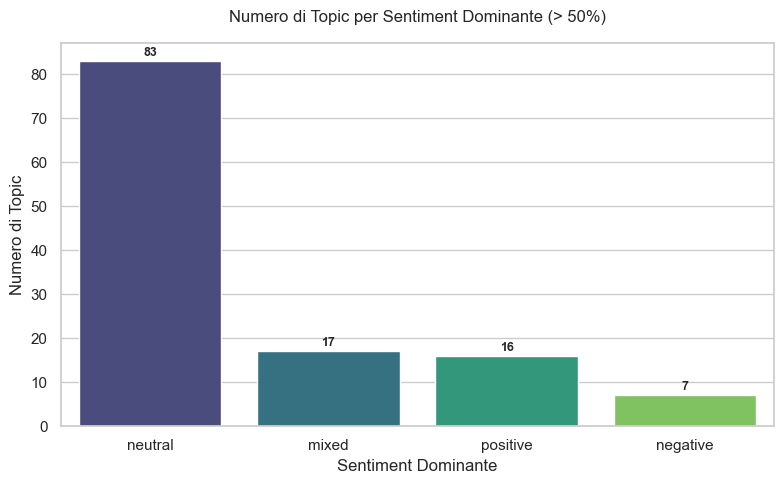

In [130]:
# 🔢 Step 1: Crosstab con frequenza sentimenti per topic
topic_sentiment_ct = pd.crosstab(df['Topic'], df['label'])

# 🔁 Step 2: Calcola la quota (%) di ogni sentimento per topic
topic_sentiment_pct = topic_sentiment_ct.div(topic_sentiment_ct.sum(axis=1), axis=0)

# 🎯 Step 3: Determina il sentimento dominante solo se ha più del 50%
def get_dominant_sentiment(row):
    max_sentiment = row.idxmax()
    if row[max_sentiment] > 0.5:
        return max_sentiment
    else:
        return 'mixed'

topic_sentiment_pct['dominant_sentiment'] = topic_sentiment_pct.apply(get_dominant_sentiment, axis=1)

# Step 4: Conta quanti topic hanno dominante positivo, negativo, etc.
dominant_counts = topic_sentiment_pct['dominant_sentiment'].value_counts()

# Converto in DataFrame per usarlo con seaborn
dominant_df = dominant_counts.reset_index()
dominant_df.columns = ['sentiment', 'count']

# Step 5: Visualizza con Seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='sentiment', y='count', data=dominant_df, palette='viridis')

# Aggiungi etichette sopra le barre
for i, row in dominant_df.iterrows():
    ax.text(i, row['count'] + 0.5, str(row['count']),
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title("Numero di Topic per Sentiment Dominante (> 50%)", pad=15)
plt.xlabel("Sentiment Dominante")
plt.ylabel("Numero di Topic")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
